In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datasets

/home/tgebhart/anaconda3/envs/scirepeval/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = 'SPECTER'
quantiles = 5
eval_loc = f'results/{model_name}/results.jsonl'
tasks_config = f'config/{model_name}/save.jsonl'

measure_name = 'i_5'
measure_loc = f'data/s2ag/s2ag_disruption.parquet.gz'

# measure_name = 'betweenness_centrality_normalized_0hop_5'
# measure_loc = f'data/s2ag/{measure_name}_1700-2022.csv.gz'


In [3]:
if 'cd' in measure_name:
    impact = pd.read_parquet(measure_loc, columns=[measure_name, 'bcites_300']).reset_index()
    impact = impact.loc[impact['bcites_300'] > 0]
if 'i_' in measure_name:
    impact = pd.read_parquet(measure_loc, columns=[measure_name]).reset_index()
    impact[measure_name] = np.log(impact[measure_name])
    impact[impact < 0] = 0
if 'centrality' in measure_name:
    impact = pd.read_csv(measure_loc).rename(columns={'Unnamed: 0': 'record_id'})
impact.head()

/home/tgebhart/anaconda3/envs/scirepeval/lib/python3.8/site-packages/pandas/core/arraylike.py:405: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,record_id,i_5
0,7087311,0.0
1,52938586,0.0
2,214821609,0.0
3,54024956,0.0
4,19107977,0.0


In [4]:
maps = []
configs_seen = []
with open(tasks_config, encoding="utf-8") as f:
    for line in f:
        d = json.loads(line)
        meta = d['data']['meta']
        if meta['config'] not in configs_seen:
            ds = datasets.load_dataset(meta['name'], meta['config'])['evaluation'].to_pandas()
            if 'query' in ds.columns:
                ds = pd.concat([ds.drop(['query'], axis=1), ds['query'].apply(pd.Series)], axis=1)
            maps.append(ds)
            configs_seen.append(meta['config'])

map = pd.concat(maps)
map.head()

,candidates,doc_id,title,abstract,corpus_id,0,rating,confidence,authors,decision,...,cited_by,references,year,venue,n_citations,log_citations,norm_year,scaled_year,n_authors,norm_authors
0,"[{'doc_id': '17928366', 'title': 'MEK1 and MEK...",22569528,"ERK1/2 MAP kinases: structure, function, and r...",ERK1 and ERK2 are related protein-serine/threo...,42176493.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'doc_id': '18818436', 'title': 'Analysis of ...",23613754,ERK2 suppresses self-renewal capacity of embry...,Activation of the FGF-ERK pathway is necessary...,14700898.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'doc_id': '18443018', 'title': 'PEPITO: impr...",29409062,Novel overlapping subgraph clustering for the ...,Motivation: Antigens that contain overlapping ...,3734715.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'doc_id': '17901128', 'title': 'Fibroblast g...",29360039,Crk proteins transduce FGF signaling to promot...,Specific cell shapes are fundamental to the or...,3508568.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'doc_id': '19136617', 'title': 'Genome-wide ...",27461729,Systematic identification of protein combinati...,Chromatin looping plays a pivotal role in gene...,20306998.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
map.tail()

,candidates,doc_id,title,abstract,corpus_id,0,rating,confidence,authors,decision,...,cited_by,references,year,venue,n_citations,log_citations,norm_year,scaled_year,n_authors,norm_authors
29995,NaN,213296711,Els fraseologismes en l'obra dramatica d'Eduar...,En aquest article s'estudien les unitats frase...,213296711.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2020.0,,NaN,NaN,0.875,3.25500,1.0,-0.694
29996,NaN,221623014,Simple visualized readout of suppressed coffee...,We present a facile method based on the coffee...,221623014.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2020.0,Biosensors bioelectronics,NaN,NaN,0.875,3.25500,5.0,0.281
29997,NaN,145720214,Multicultural e learning project and compariso...,Purpose The purpose of this paper is to descri...,145720214.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2007.0,,NaN,NaN,0.062,0.23064,1.0,-0.694
29998,NaN,51923936,An Evaluation on the Robustness of Five Popula...,Laser scanning microscopy (LSM) techniques are...,51923936.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2018.0,IEEE Access,NaN,NaN,0.750,2.79000,2.0,-0.450
29999,NaN,191091958,La Villa Imperial de Potosi. La Babilonia Amer...,,191091958.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2010.0,,NaN,NaN,0.250,0.93000,1.0,-0.694


In [6]:
with open(eval_loc, 'rb') as f:
    eval_data = json.load(f)

In [7]:
dfs = []
for task in eval_data.keys():
    df = pd.DataFrame.from_dict(eval_data[task], orient='index').unstack().to_frame('value')
    df['task'] = task
    df.index.names = ['metric','doc_id']
    df = df.reset_index().merge(map[['corpus_id','doc_id','year']], on='doc_id')
    dfs.append(df)

df = pd.concat(dfs)
df.head()

,metric,doc_id,value,task,corpus_id,year
0,map,22569528,0.574900,RELISH,42176493.0,NaN
1,ndcg,22569528,0.859093,RELISH,42176493.0,NaN
2,map,23613754,0.809718,RELISH,14700898.0,NaN
3,ndcg,23613754,0.921405,RELISH,14700898.0,NaN
4,map,29409062,0.769432,RELISH,3734715.0,NaN


In [8]:
merged = df.merge(impact, left_on='corpus_id', right_on='record_id')
merged.head()

,metric,doc_id,value,task,corpus_id,year,record_id,i_5
0,map,22569528,0.574900,RELISH,42176493.0,NaN,42176493,6.025866
1,ndcg,22569528,0.859093,RELISH,42176493.0,NaN,42176493,6.025866
2,map,23613754,0.809718,RELISH,14700898.0,NaN,14700898,2.833213
3,ndcg,23613754,0.921405,RELISH,14700898.0,NaN,14700898,2.833213
4,map,29409062,0.769432,RELISH,3734715.0,NaN,3734715,1.098612


In [9]:
# for task in merged['task'].unique():
#     print(task)
#     print(merged[merged['task'] == task].corr())
merged.groupby('task').corr(method='pearson')

/tmp/ipykernel_133519/2711189587.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged.groupby('task').corr(method='pearson')


value  corpus_id  year  record_id       i_5
task                                                                    
Citation Count value      1.000000  -0.041602   NaN  -0.041602 -0.687619
               corpus_id -0.041602   1.000000   NaN   1.000000 -0.027512
               year            NaN        NaN   NaN        NaN       NaN
               record_id -0.041602   1.000000   NaN   1.000000 -0.027512
               i_5       -0.687619  -0.027512   NaN  -0.027512  1.000000
...                            ...        ...   ...        ...       ...
Tweet Mentions value      1.000000  -0.088132   NaN  -0.088132 -0.079140
               corpus_id -0.088132   1.000000   NaN   1.000000 -0.019452
               year            NaN        NaN   NaN        NaN       NaN
               record_id -0.088132   1.000000   NaN   1.000000 -0.019452
               i_5       -0.079140  -0.019452   NaN  -0.019452  1.000000

[65 rows x 5 columns]

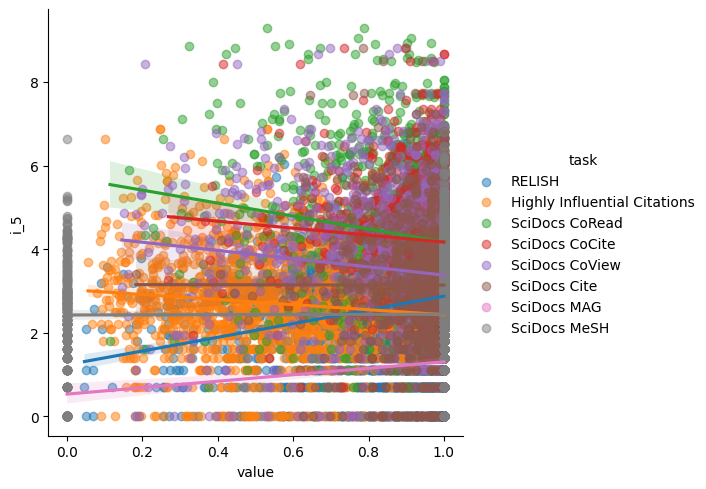

In [10]:
g = sns.lmplot(
    data=merged[(merged[measure_name] < 1000) & (merged['metric'] != 'kendalltau')],
    x="value", y=measure_name, hue="task", scatter_kws={'alpha': 0.5},
)

In [11]:
from linearmodels.panel import PanelOLS
from statsmodels.api import add_constant
panel = merged.dropna(subset=['year'])
panel['year'] = panel['year'].astype(int)
panel = panel.set_index(['doc_id', 'year'])

for task in [t for t in panel['task'].unique() if t not in ['SciDocs MAG', 'SciDocs MeSH']]:
    print(task)
    tp = panel[panel['task'] == task]
    model = PanelOLS(tp['value'], add_constant(tp[[measure_name]]), entity_effects=False, time_effects=False)
    results = model.fit()
    print(results)

SciDocs CoRead
                          PanelOLS Estimation Summary                           
Dep. Variable:                  value   R-squared:                        0.0168
Estimator:                   PanelOLS   R-squared (Between):              0.0185
No. Observations:                1458   R-squared (Within):               0.0000
Date:                Thu, Mar 21 2024   R-squared (Overall):              0.0168
Time:                        14:53:39   Log-likelihood                    704.40
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      24.906
Entities:                        8668   P-value                           0.0000
Avg Obs:                       0.1682   Distribution:                  F(1,1456)
Min Obs:                       0.0000                                           
Max Obs:                       4.0000   F-statistic (robust):             24.906
             

/tmp/ipykernel_133519/513282642.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  panel['year'] = panel['year'].astype(int)


In [12]:
merged['measure_quantile'] = merged.groupby(['task','metric'])[measure_name].transform(lambda x: pd.qcut(x, q=quantiles, duplicates='drop', labels=False)) + 1

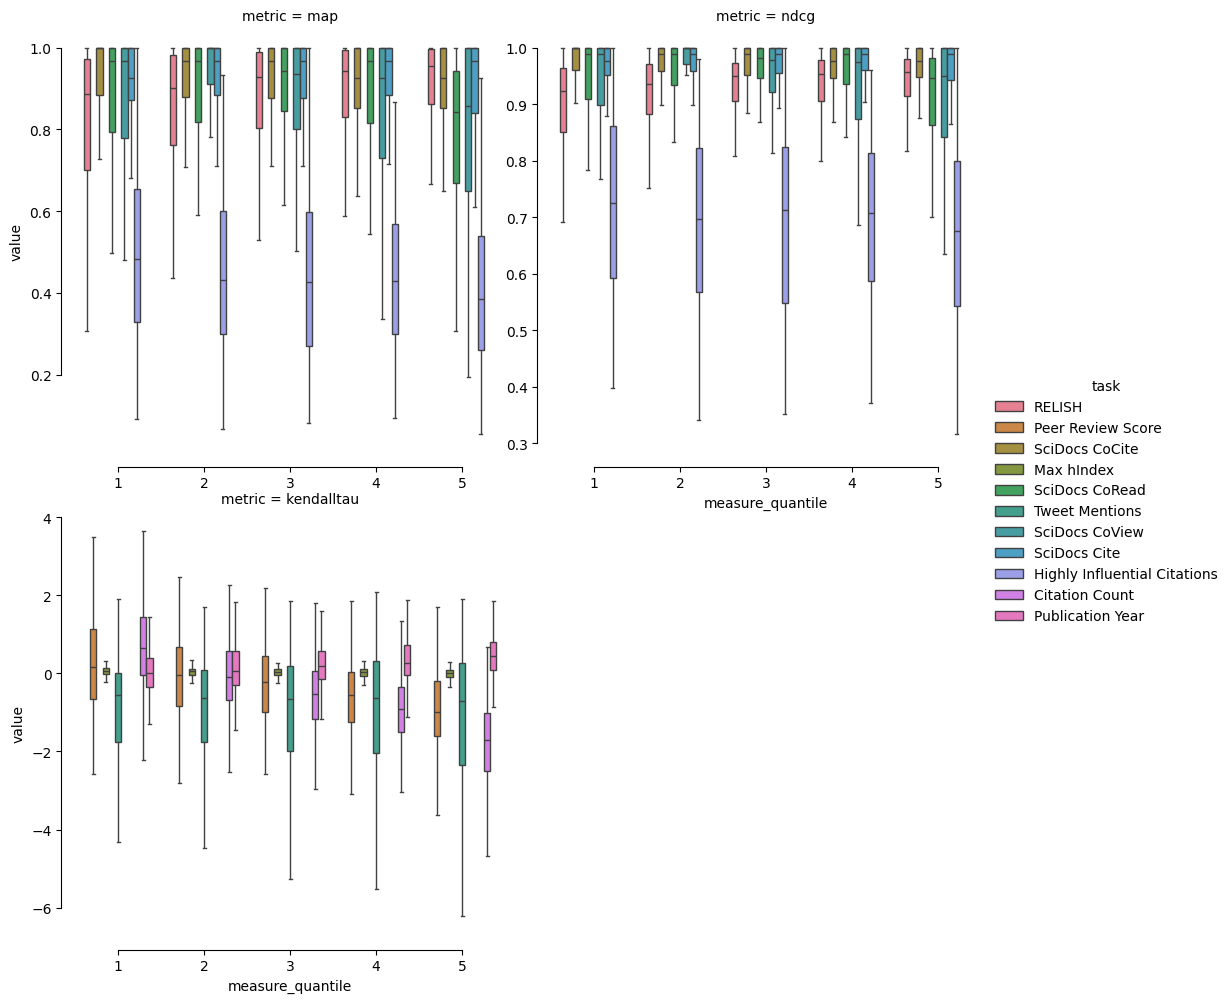

In [13]:
sns.catplot(x="measure_quantile", y="value",
            hue="task", col="metric", col_wrap=2,
            kind='box', sharey=False, showfliers=False,
            data=merged[merged['metric'] != 'f1_macro'])
sns.despine(offset=10, trim=True)

In [14]:
merged[merged['metric'] == 'f1_macro'].groupby(['task','measure_quantile']).mean()

/tmp/ipykernel_133519/3758410012.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged[merged['metric'] == 'f1_macro'].groupby(['task','measure_quantile']).mean()


value     corpus_id         year  \
task         measure_quantile                                        
SciDocs MAG  1                 0.854545  3.736698e+07  2000.905455   
             2                 0.936709  3.005079e+07  2004.607595   
             3                 0.942149  2.708314e+07  2006.107438   
             4                 0.981818  1.839623e+07  2008.518182   
SciDocs MeSH 1                 0.895035  2.728381e+07  2005.921986   
             2                 0.902174  2.862173e+07  2008.861586   
             3                 0.891808  3.290475e+07  2009.749614   
             4                 0.897476  2.937863e+07  2009.667192   
             5                 0.904615  3.200470e+07  2009.435385   

                                  record_id       i_5  
task         measure_quantile                          
SciDocs MAG  1                 3.736698e+07  0.143671  
             2                 3.005079e+07  1.236991  
             3                 2.708314e+07  1.927312  
             4                 1.839623e+07  3.186294  
SciDocs MeSH 1                 2.728381e+07  0.684105  
             2                 2.862173e+07  1.906818  
             3                 3.290475e+07  2.533151  
             4                 2.937863e+07  3.099241  
             5                 3.200470e+07  4.145330

In [15]:
merged[merged['metric'] == 'kendalltau'].groupby(['task','measure_quantile']).mean()

/tmp/ipykernel_133519/2777262728.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged[merged['metric'] == 'kendalltau'].groupby(['task','measure_quantile']).mean()


value     corpus_id         year  \
task              measure_quantile                                        
Citation Count    1                 0.700547  3.604403e+07  2016.000000   
                  2                -0.085394  3.508169e+07  2016.000000   
                  3                -0.539043  2.969528e+07  2016.000000   
                  4                -0.921182  3.059688e+07  2016.000000   
                  5                -1.798304  3.409271e+07  2016.000000   
Max hIndex        1                 0.054759  2.117844e+08          NaN   
                  2                 0.030237  2.164105e+08          NaN   
                  3                 0.019476  2.084220e+08          NaN   
                  4                 0.008202  1.836013e+08          NaN   
                  5                -0.020781  1.166702e+08          NaN   
Peer Review Score 1                 0.247567  2.077324e+08          NaN   
                  2                -0.015302  2.029747e+08          NaN   
                  3                -0.240177  1.908806e+08          NaN   
                  4                -0.540446  1.565493e+08          NaN   
                  5                -0.863449  1.063862e+08          NaN   
Publication Year  1                 0.086570  1.360453e+08  2017.846863   
                  2                 0.185318  1.151649e+08  2017.249467   
                  3                 0.255104  1.006681e+08  2017.185430   
                  4                 0.378039  7.993103e+07  2016.683884   
                  5                 0.502146  7.235399e+07  2016.144708   
Tweet Mentions    1                -1.209387  1.080718e+08          NaN   
                  2                -1.271637  1.209171e+08          NaN   
                  3                -1.234599  1.124298e+08          NaN   
                  4                -1.286240  1.182700e+08          NaN   
                  5                -1.815584  1.036291e+08          NaN   

                                       record_id       i_5  
task              measure_quantile                          
Citation Count    1                 3.604403e+07  0.786238  
                  2                 3.508169e+07  2.126559  
                  3                 2.969528e+07  2.878098  
                  4                 3.059688e+07  3.623191  
                  5                 3.409271e+07  5.049316  
Max hIndex        1                 2.117844e+08  0.464594  
                  2                 2.164105e+08  1.646170  
                  3                 2.084220e+08  2.365503  
                  4                 1.836013e+08  3.256888  
                  5                 1.166702e+08  4.914128  
Peer Review Score 1                 2.077324e+08  0.213276  
                  2                 2.029747e+08  1.463986  
                  3                 1.908806e+08  2.449099  
                  4                 1.565493e+08  3.501441  
                  5                 1.063862e+08  5.143495  
Publication Year  1                 1.360453e+08  0.399646  
                  2                 1.151649e+08  1.791182  
                  3                 1.006681e+08  2.670356  
                  4                 7.993103e+07  3.545748  
                  5                 7.235399e+07  5.087072  
Tweet Mentions    1                 1.080718e+08  0.174688  
                  2                 1.209171e+08  1.408424  
                  3                 1.124298e+08  2.303245  
                  4                 1.182700e+08  3.162359  
                  5                 1.036291e+08  4.575985

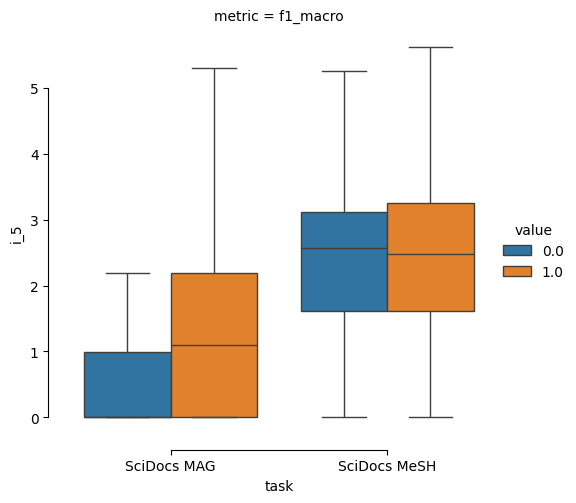

In [16]:
sns.catplot(x="task", y=measure_name,
            hue="value", col="metric", kind='box', sharey=False, 
            data=merged[merged['metric'] == 'f1_macro'], showfliers=False)
sns.despine(offset=10, trim=True)